In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("youtube_channel_real_performance_analytics.csv")

In [5]:
data.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [7]:
data.isna().sum()

ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64

In [51]:
# We can ask some questions to the dataset to gather information about which features can be used in our predictive model 

# The impact of day of week on YouTube Ads Revenue
# Ad Impressions vs YouTube Ads Revenue
# Teaser Clicks vs YouTube Ads Revenue

<Axes: xlabel='Day of Week', ylabel='YouTube Ads Revenue (USD)'>

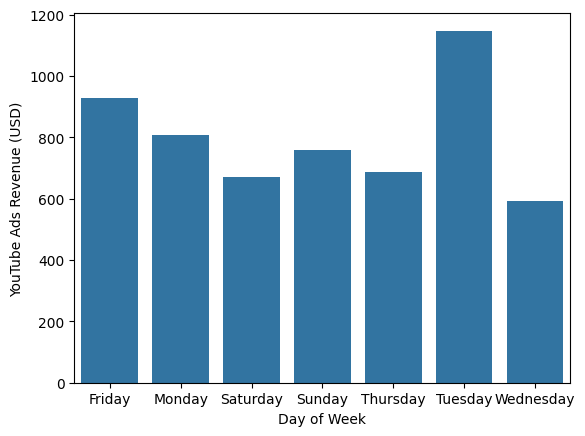

In [65]:
day_distribution = data.groupby("Day of Week")['YouTube Ads Revenue (USD)'].sum()
day_distribution = day_distribution.reset_index()
sns.barplot(data=day_distribution, x='Day of Week', y='YouTube Ads Revenue (USD)')

<Axes: xlabel='Ad Impressions', ylabel='YouTube Ads Revenue (USD)'>

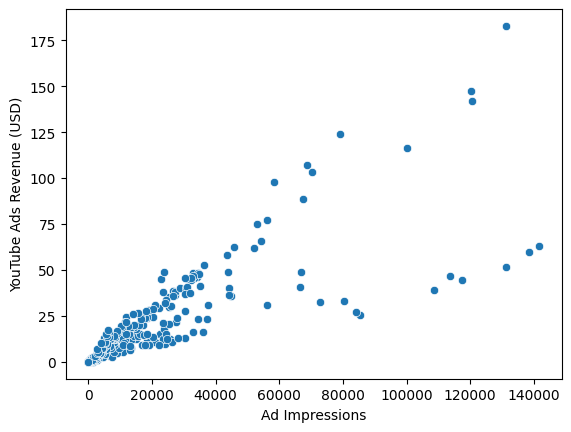

In [70]:
sns.scatterplot(data, x='Ad Impressions', y='YouTube Ads Revenue (USD)')

<Axes: xlabel='Video Duration', ylabel='YouTube Ads Revenue (USD)'>

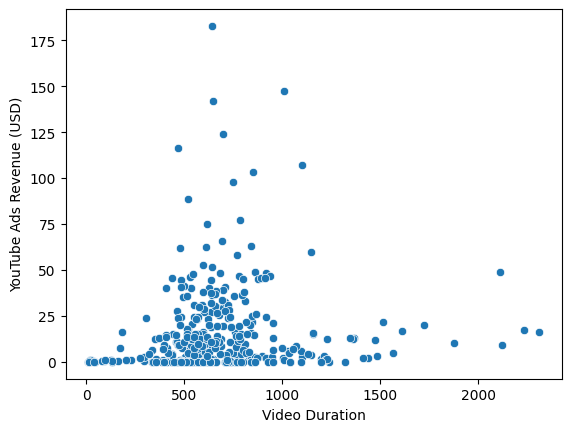

In [69]:
sns.scatterplot(data, x='Video Duration', y='YouTube Ads Revenue (USD)')

<Axes: xlabel='YouTube Premium Views', ylabel='YouTube Ads Revenue (USD)'>

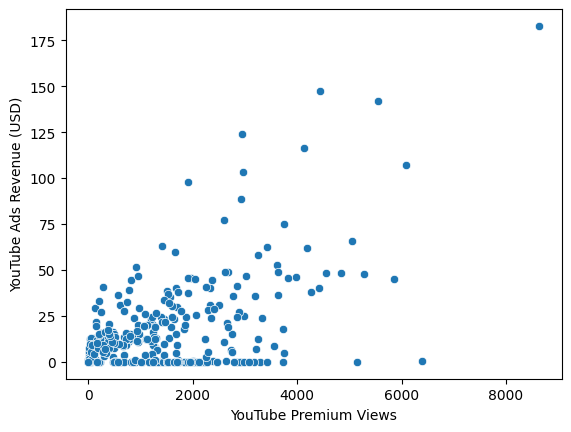

In [72]:
sns.scatterplot(data, x='YouTube Premium Views', y='YouTube Ads Revenue (USD)')

<Axes: xlabel='Month', ylabel='YouTube Ads Revenue (USD)'>

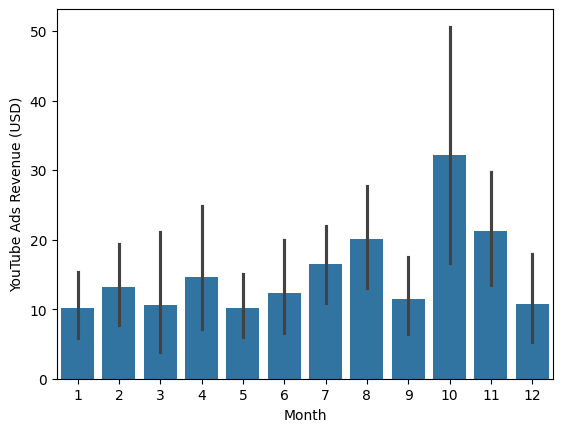

In [74]:
# Checking the monthly impact of views

sns.barplot(data, x='Month', y='YouTube Ads Revenue (USD)')

<Axes: xlabel='Day', ylabel='YouTube Ads Revenue (USD)'>

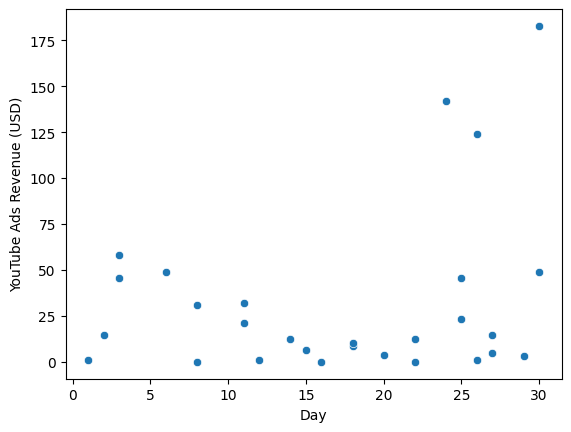

In [76]:
filtered_data = data[data['Month']==10]

sns.scatterplot(filtered_data, x='Day', y='YouTube Ads Revenue (USD)')

<Axes: xlabel='Video Duration', ylabel='YouTube Ads Revenue (USD)'>

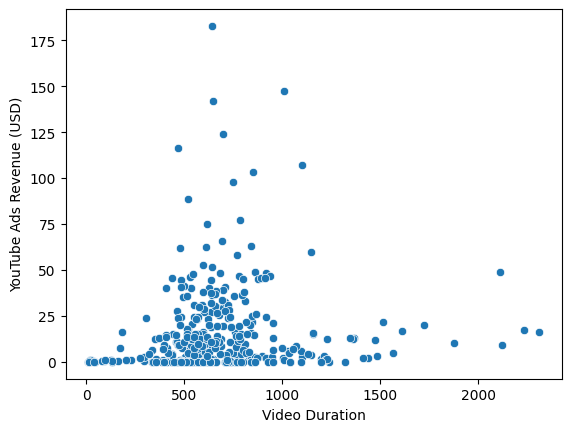

In [103]:
sns.scatterplot(data,x='Video Duration', y='YouTube Ads Revenue (USD)')

### The above plots do not show clear relation except Ads Impressions

In [97]:
# Correlation between the features and the dependent variable 

numeric_data = data.select_dtypes(include=['number'])

correlations = numeric_data.corr()['YouTube Ads Revenue (USD)']
correlations[(correlations>0.5) | (correlations < -0.5)]

Monetized Playbacks (Estimate)        0.946049
Ad Impressions                        0.832923
Estimated AdSense Revenue (USD)       0.994282
YouTube Ads Revenue (USD)             1.000000
Watch Page Ads Revenue (USD)          0.999976
YouTube Premium (USD)                 0.696313
YouTube Premium Watch Time (hours)    0.570108
YouTube Premium Views                 0.560210
Estimated Revenue (USD)               0.999471
Name: YouTube Ads Revenue (USD), dtype: float64

In [101]:
data.rename(columns={"YouTube\xa0Premium (USD)":"YouTube Premium (USD)"}, inplace=True)

In [129]:
# Estimated Revenue and Estimated AdSense Revenue are duplicated in a sense they reflect the same thing, therefore one can be dropped.

columns_to_keep = ["Monetized Playbacks (Estimate)", "Ad Impressions", "Estimated AdSense Revenue (USD)", "Watch Page Ads Revenue (USD)", "YouTube Premium (USD)", 
                   "YouTube Premium Watch Time (hours)", "YouTube Premium Views", "YouTube Ads Revenue (USD)"]

data[columns_to_keep]

,Monetized Playbacks (Estimate),Ad Impressions,Estimated AdSense Revenue (USD),Watch Page Ads Revenue (USD),YouTube Premium (USD),YouTube Premium Watch Time (hours),YouTube Premium Views,YouTube Ads Revenue (USD)
0,723.0,981.0,0.527,0.551,0.010,2.5358,152.0,1.002
1,727.0,861.0,0.635,0.645,0.004,0.8911,32.0,1.172
2,76.0,88.0,0.088,0.088,0.001,0.1838,28.0,0.160
3,18.0,35.0,0.016,0.016,0.000,0.0711,20.0,0.030
4,0.0,0.0,0.000,0.000,0.000,0.2519,39.0,0.000
...,...,...,...,...,...,...,...,...
359,4104.0,5877.0,7.810,7.810,0.253,51.2030,425.0,14.199
360,3273.0,5500.0,8.477,8.477,0.228,39.8158,405.0,15.413
361,3605.0,6237.0,9.425,9.425,0.427,83.5075,377.0,17.136
362,2338.0,2797.0,3.729,3.729,0.129,23.8540,326.0,6.773


In [130]:
# Splitting data into dependent and independent features
X = data[columns_to_keep].iloc[:,:-1]
y = data[columns_to_keep].iloc[:,-1]

In [134]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [135]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [136]:
y_pred = lr.predict(X_test)

In [137]:
from sklearn.metrics import root_mean_squared_error

print(root_mean_squared_error(y_test, y_pred))

0.01655251721187808


In [140]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(lr, X_train, y_train, cv=5)

print(accuracies)

[0.99999921 0.9999991  0.99999932 0.9997132  0.99999911]


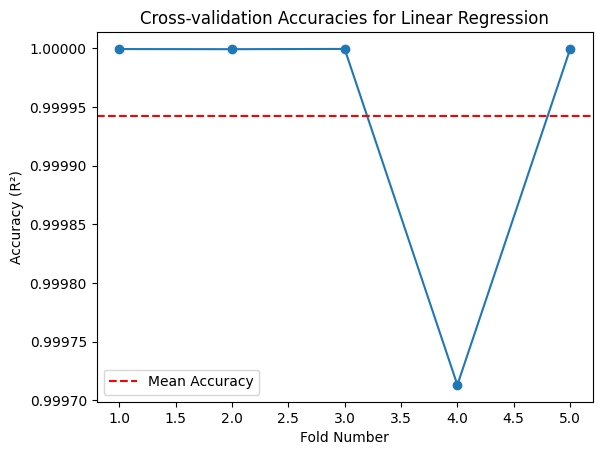

In [141]:
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy (R²)')
plt.title('Cross-validation Accuracies for Linear Regression')
plt.axhline(y=accuracies.mean(), color='r', linestyle='--', label='Mean Accuracy')
plt.legend()
plt.show()

### Using SVR (But data size might be insufficient)

In [145]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [155]:
 # Using SVR to predict  

from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

svr.fit(X_train_scaled, y_train)


SVR()

In [156]:
y_pred = svr.predict(X_test_scaled)

In [157]:
root_mean_squared_error(y_test, y_pred)

np.float64(9.196909085299772)

In [158]:
print(cross_val_score(svr,X_train_scaled, y_train,cv=5))

[0.41786123 0.46895075 0.22108104 0.32279864 0.31981732]
